In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [21]:
from sklearn.datasets import load_iris

In [22]:
iris=load_iris()

In [23]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [25]:
x=pd.DataFrame(iris['data'], columns=['sepal_length', 'sepal width', 'petal length ', 'petal width'])

In [26]:
y=iris['target']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train , x_test , y_train , y_test= train_test_split(x,y , test_size=0.3 , random_state=33)

In [29]:
# Apply decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [30]:
dtc=DecisionTreeClassifier(max_depth=2)

In [31]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [32]:
# visulaize the decision tree

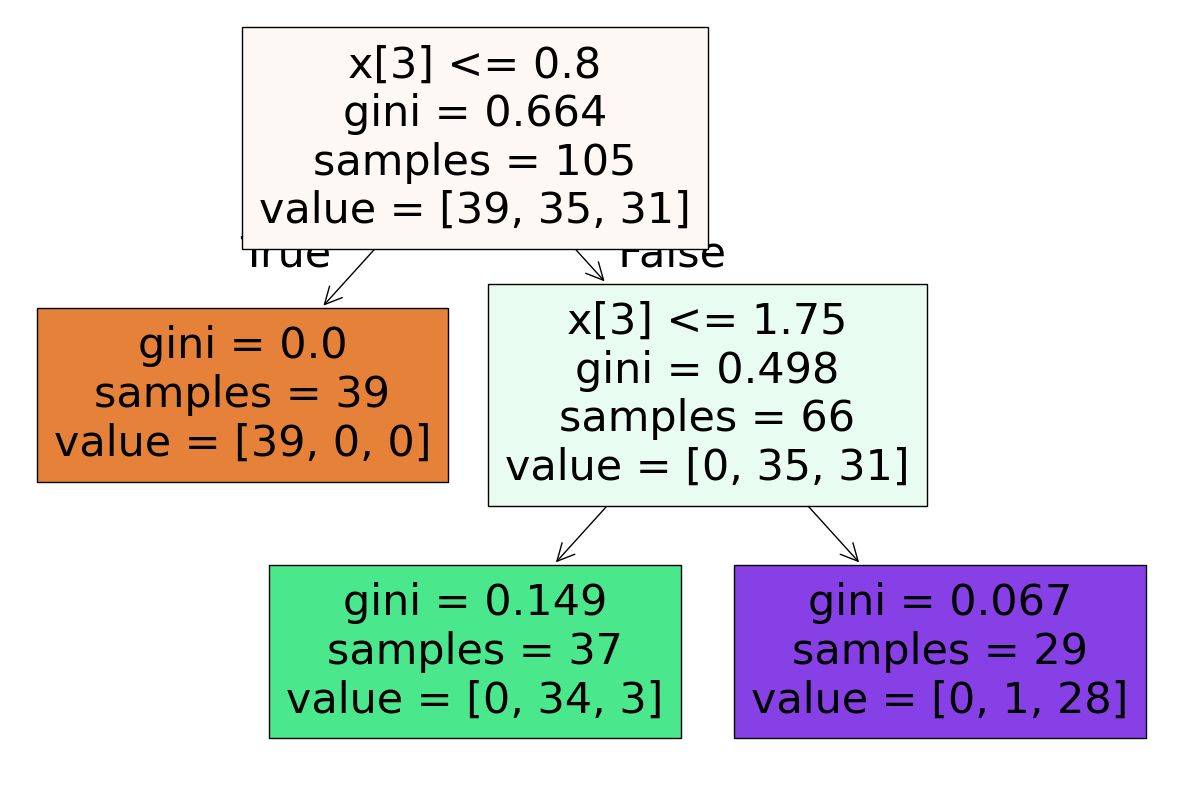

In [33]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtc , filled=True);

In [ ]:
# use post pruning to reduce overfitting
# set max_depth =2

In [35]:
y_pred= dtc.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [51]:
cm= confusion_matrix(y_test ,y_pred)
print(cm)
print(classification_report(y_test , y_pred))

[[11  0  0]
 [ 0 15  0]
 [ 0  4 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.79      1.00      0.88        15
           2       1.00      0.79      0.88        19

    accuracy                           0.91        45
   macro avg       0.93      0.93      0.92        45
weighted avg       0.93      0.91      0.91        45



# Prepruning and hyperparameter tuning

In [52]:
''' 
Prepruning stops the tree before it fully grows. It places a limit on the tree’s expansion during the training process by checking certain conditions at each node.
'''

' \nPrepruning stops the tree before it fully grows. It places a limit on the tree’s expansion during the training process by checking certain conditions at each node.\n'

In [53]:
params={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto', 'sqrt', 'log2']
}

In [54]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(dtc , param_grid=params , cv=5, scoring='accuracy')

In [55]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [56]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [57]:
grid.best_score_

np.float64(0.9619047619047618)

In [58]:
y_pred=grid.predict(x_test)

In [59]:
cm= confusion_matrix(y_test ,y_pred)
print(cm)
print(classification_report(y_test , y_pred))


[[11  0  0]
 [ 0 15  0]
 [ 0  2 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.94        15
           2       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [60]:
print(accuracy_score(y_pred, y_test))

0.9555555555555556
